# Lab Statement
This lab examines the univarate relationship between the weight of the brain and size of the head through using Linear Regression Data Analysis and SciKit-Learn.

# Objectives
- Create a professional looking Jupyter Notebook
- Use Pandas and Pandas Dataframes to Import Data
- Use SciKitLearn and NumPy modules
- Perform Linear Regression Analysis with Imported Data
- Use the MatPlotLib plotting module to plot data
- Use the Regression Model to Make Predictions

# Linear Regression
Linear Regression attempts to model the relationship between two variables by fitting a linear equation to obeserved data. One variable (usually X) is considered to be an explantory (independent or input) variable, and the other variable (usually Y) is considered to be the dependent variable. Simple Linear Regression has an equation in the form of **Y = aX + b**, where **X** is the explanatory variable and **Y** is the dependent variable. The **Slope** of the line is **a**, and the **Intercept** is **b** (the value of y when x = 0). Linear Regression is powerful and is one of the most commonly used machine learning algorithms because of its ability to predict the target variable using linear combinations of predictor variables.

# Preliminary Data Analysis

## Importing the Essentials

In [1]:
#Importing MatPlotLib
%matplotlib inline
import matplotlib.pyplot as plt

#Importing NumPy
import numpy as np

#Importing Pandas
import pandas as pd

## Information About the Dataset
***Source:*** R.J. Gladstone (1905). "A Study of the Relations of the Brain to to the Size of the Head", Biometrika, Vol. 4, pp105-123

***Description:*** Brain weight (grams) and head size (cubic cm) for 237 adults classified by gender and age group.

***Variables/Columns:***
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)

## Loading the Dataset in a Pandas Dataframe

In [2]:
df = pd.read_csv('data/dataset_brain.txt',
                  encoding = 'utf-8',
                  comment = '#',
                  sep = '\s+')

df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


## Summary of Descriptive Statistics 

### Summary of "Head Size" Data

In [3]:
df['head-size'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: head-size, dtype: float64

### Summary of "Brain Weight" Data

In [4]:
df['brain-weight'].describe()

count     237.000000
mean     1282.873418
std       120.340446
min       955.000000
25%      1207.000000
50%      1280.000000
75%      1350.000000
max      1635.000000
Name: brain-weight, dtype: float64

## Examine Data for Staistical Correlations of Features

In [5]:
df.corr()

,gender,age-group,head-size,brain-weight
gender,1.000000,-0.088652,-0.514050,-0.465266
age-group,-0.088652,1.000000,-0.105428,-0.169438
head-size,-0.514050,-0.105428,1.000000,0.799570
brain-weight,-0.465266,-0.169438,0.799570,1.000000


## Plot Data Showing *High* Correlation

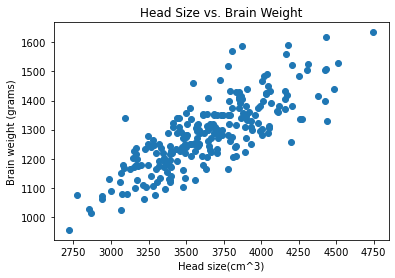

In [6]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.title('Head Size vs. Brain Weight')
plt.xlabel('Head size(cm^3)')
plt.ylabel('Brain weight (grams)');

# Preparing the Dataset for the Split

## Preparation for Model Building

In [7]:
y = df['brain-weight'].values
y.shape

(237,)

## Adding Another Axis
SciKitLearn and NumPy expect the data to be 2 Dimensional, so we need to add another axis to the data. The **newaxis** object can be used in all slicing operations to create and axis of length one. Each newaxis object in the selection tuple serves to expand the dimensions of the selection by one unit-length dimension. Newaxis is an alias for *None* and *None* can be used in place of this with the same result.

In [8]:
X = df['head-size'].values
X = X.reshape(237,1)
#X = X[:, np.newaxis] <--This command (used often) will do the same thing as the command above
X.shape

(237, 1)

## Resizing NumPy Arrays (Aside)

In [9]:
#Import NumPy
import numpy as np

#Create 2 Dimensional Array (1 Row and 3 Columns)
A = np.array([1, 2, 3])
C = np.array([4, 5, 6])
print('The shape of the array A is {0} and of array C is {1}: '.format(A.shape, C.shape))
print(A)
print(C)
print()
print('Now add a dimension to both arrays using two different methods')
print()
#Array B uses the "newaxis" command
B = A[:, np.newaxis]
#Array D uses the "reshape" command
D = C.reshape(3,1)
print('Now the shape of Array B is {0} and of Array D is {1}:'.format(B.shape, D.shape))
print(B)
print(D)

The shape of the array A is (3,) and of array C is (3,): 
[1 2 3]
[4 5 6]

Now add a dimension to both arrays using two different methods

Now the shape of Array B is (3, 1) and of Array D is (3, 1):
[[1]
 [2]
 [3]]
[[4]
 [5]
 [6]]


# Splitting the Data

## Train/Test Split of the Dataset
SciKitLearn contains a function called the **train_test_split** that will randomly shuffle the dataset and then split it into two datasets: a **training set** used to build to model and **test set** to assess and evaluate how well the model works on unseen data (also known as *out of sample* data). The **train_test_split** funcion by default does a **75%/25%** train/test test split by the split can be modified by tuning the parameters of the function as indicated below...

<img src='images/train_test_split_image.PNG' width=500; height=300>

In [10]:
#Import the Train_Test_Split from SciKitLearn
from sklearn.model_selection import train_test_split

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 100)

#Check the shapes of the Testing Set and the Training Set to make sure everything went ok
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177, 1)
(177,)
(60, 1)
(60,)


### What Did This Split Do?
- Model can be trained and tested on **different data**
- Responsible values (y) are known for the testing set
- **Testing Accuracy** is a better estimate than training accuracy of out-of-sample performance

## Creating a Graph to Visually Check the Split

Text(0, 0.5, 'Brain Weight (grams)')

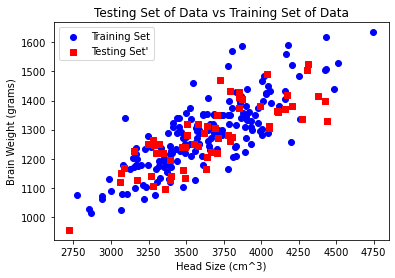

In [11]:
#Data
plt.scatter(X_train, y_train, c = 'blue', marker = 'o', label = "Training Set")
plt.scatter(X_test, y_test, c = 'red', marker = 's', label = "Testing Set'")

#Title
plt.title('Testing Set of Data vs Training Set of Data')

#Legend
plt.legend(loc = 'upper left')

#Axes
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

## What Did We Learn?
The data trends show that the brain weight increases as we move to larger head sizes. A general relationship between circumfrence and brain weight is believed to exist, but research shows that brain weight is proportional to the cube of the head circumfrence from birth through age 3.5. 

Let's use the raw data to...
1. Find the Best Fit for the Data
2. Create a model from the Best Fit Parameters
3. Testing the Model Predictive Capability with New Data
4. Evaluating the Model's Performance

# Fitting The Model

## Linear Regression Fit
1. Instantiate the Linear Regression class from the SciKitLearn module
2. Fit the model only using the ***training data***

In [12]:
#Import SciKitLearn's Linear Model
from sklearn.linear_model import LinearRegression

#Instantiate the Class (Object)
lr = LinearRegression()

#Call the Fit Method
lr.fit(X_train, y_train)

LinearRegression()

## Generating Predictions
Let's generate the predictions (through using an array) based on the Testing Data as an input

In [13]:
y_pred = lr.predict(X_test)

# Evaluating the Model

## The "Brute Force" Scoring Method

In [14]:
sum_of_squares = ((y_test - y_pred)**2).sum()
res_sum_of_squares = ((y_test - y_test.mean())**2).sum()
r2_score = 1 - (sum_of_squares/res_sum_of_squares)
print('The R2 Score is: {0:.3f}'.format (r2_score))

The R2 Score is: 0.612


## SciKitLearn's Built-In Scoring Method

In [15]:
print('The R2 score is: {0:0.3f}'.format(lr.score(X_test, y_test)))

The R2 score is: 0.612


# Building The Predictive Model
The first things we need to build the model are the slope and intercept. The code used to get these values is shown below:

## Finding the Slope

In [16]:
slope = lr.coef_
slope

array([0.27465969])

## Finding the Intercept

In [17]:
intercept = lr.intercept_
intercept

289.2821710467691

## The Final Model
Now that we have the slope and the intercept, it's time to build the model. In the end, we'll use the model to create data to be plotted in our training set...

In [18]:
y_fit = slope*X_train + intercept
#y_fit

### Brain_Weight = (0.274 * Head_Size) + 289.3

# Creating a Comparison Graph
In order to figure out how effective our model and fitted data is compared to the original raw data, we need to create a graph that has both the raw data and fitted data on it. The code and results can be seen below:

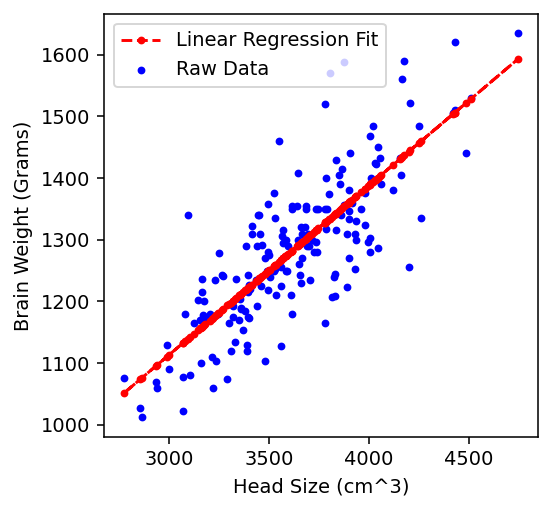

In [19]:
#Define the Plot Size (Inches) + Resolution (DPI)
fig = plt.figure(figsize = (4, 4), dpi = 140)
plt.scatter(X_train, y_train, c = 'blue', marker = '.', label = 'Raw Data')
plt.plot(X_train, y_fit, linestyle = 'dashed', marker = '.', color = 'red', label = 'Linear Regression Fit')
plt.plot

#Labels
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (Grams)")

#Legend
plt.legend(loc="upper left")

#Show Plot
plt.show()

## Description of the Graph and Summary

This graph is telling us that there is a positive correlation between brain weight and head size. More specifically, the equation above (line of best fit) is telling us that the ***predicted brain weight for people will increase by 0.274 grams per cubic centimeter increase in head size*** as they grow.

We must be careful when using the model that was created becuase it only had an R2 value of 0.612 (about a 61% accuracy rate). This means that the fit to the data was relatively poor.